# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [38]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd

# Libraries for data preparation and model building
import numpy as np
import seaborn as sns

# Setting global constants to ensure notebook results are reproducible


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [41]:
#Load the train and test datasets
train = pd.read_csv('/content/df_train.csv', index_col=[0])
test = pd.read_csv('/content/df_test.csv', index_col=[0])
train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


**BASIC EDA ANALYSIS**

In [4]:
#View the first five rows of the train dataset
train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [5]:
#View the first five rows of the test dataset
test.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


**LEARN THE SHAPE OF THE DATASETS**

In [42]:
#First, join the the train and test datasets together into one dataframe
df = pd.concat([train, test])

In [43]:
#Learn the shape of the dataframe
print('shape:', df.shape)


shape: (11683, 48)


The dataframe has 11683 rows and 48 columns

**LEARN THE INFO OF THE DATAFRAME**

In [45]:
#Learn the info of the dataframe
print('info:', df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 11682
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  11683 non-null  object 
 1   Madrid_wind_speed     11683 non-null  float64
 2   Valencia_wind_deg     11683 non-null  object 
 3   Bilbao_rain_1h        11683 non-null  float64
 4   Valencia_wind_speed   11683 non-null  float64
 5   Seville_humidity      11683 non-null  float64
 6   Madrid_humidity       11683 non-null  float64
 7   Bilbao_clouds_all     11683 non-null  float64
 8   Bilbao_wind_speed     11683 non-null  float64
 9   Seville_clouds_all    11683 non-null  float64
 10  Bilbao_wind_deg       11683 non-null  float64
 11  Barcelona_wind_speed  11683 non-null  float64
 12  Barcelona_wind_deg    11683 non-null  float64
 13  Madrid_clouds_all     11683 non-null  float64
 14  Seville_wind_speed    11683 non-null  float64
 15  Barcelona_rain_1h  

**UNIVARIATE NONGRAPHICAL ANALYSIS**

**1. DESCRIPTIVE STATISTICS (FIVE NUMBER SUMMARY STATISTICS)**

In [46]:
#look at data statistics

df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,...,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000
mean,2.433750,0.118698,2.692873,63.774687,58.721818,43.440712,1.958629,14.155268,159.878855,2.782419,...,289.377372,289.869413,284.993657,286.447784,288.616766,288.095397,291.263219,288.282055,287.056222,10673.857612
std,1.831762,0.334918,2.321759,22.219380,24.390621,32.046215,1.696043,24.541321,101.005654,1.758587,...,9.594562,6.680538,6.730076,6.738466,6.391989,6.898601,8.136234,9.258559,9.093455,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,46.333333,38.000000,12.000000,1.000000,0.000000,76.666667,1.333333,...,282.150000,284.816667,280.122526,281.483448,284.150000,283.150000,285.483333,281.250000,280.150000,7390.333333
50%,2.000000,0.000000,2.000000,67.000000,59.333333,45.000000,1.333333,0.000000,145.666667,2.333333,...,287.843333,289.426667,284.816667,286.193333,288.276333,287.816667,290.382000,286.923333,285.816667,11114.666667
75%,3.333333,0.100000,3.666667,83.000000,80.000000,75.000000,2.666667,20.000000,233.333333,3.666667,...,296.483333,295.150000,289.816667,291.040000,293.483333,292.483333,296.641333,294.993167,293.708917,14498.166667
max,13.333333,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,360.000000,12.666667,...,314.483333,308.150000,309.816667,310.710000,306.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


**2. KURTOSIS ANALYSIS TO CHECK FOR OUTLIERS**

In [47]:
#Kurtosis analysis to check whether the dataframe has any outliers
df.kurtosis()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Madrid_wind_speed          2.156333
Bilbao_rain_1h            40.584429
Valencia_wind_speed       31.014311
Seville_humidity          -0.950169
Madrid_humidity           -1.151940
Bilbao_clouds_all         -1.519626
Bilbao_wind_speed          3.159652
Seville_clouds_all         1.950894
Bilbao_wind_deg           -1.064464
Barcelona_wind_speed       1.519692
Barcelona_wind_deg        -0.967252
Madrid_clouds_all         -0.076188
Seville_wind_speed         1.745508
Barcelona_rain_1h        130.956428
Seville_rain_1h           79.440881
Bilbao_snow_3h          1075.823322
Barcelona_pressure      4916.988101
Seville_rain_3h          552.067395
Madrid_rain_1h            63.372354
Barcelona_rain_3h        251.188884
Valencia_snow_3h        5452.830025
Madrid_weather_id          8.018543
Barcelona_weather_id       5.932283
Bilbao_pressure            1.847650
Seville_weather_id        10.402060
Valencia_pressure          2.939921
Seville_temp_max          -0.596016
Madrid_pressure            3

**INSIGHTS FROM THE KURTOSIS ANALYSIS**

The following columns have a large number of outliers as their kurtosis score is greater than 3:

Bilbao_rain_1h            40.584429

Valencia_wind_speed       31.014311

Barcelona_rain_1h        130.956428

Seville_rain_1h           79.440881

Bilbao_snow_3h          1075.823322

Barcelona_pressure      4916.988101

Seville_rain_3h          552.067395

Madrid_rain_1h            63.372354

Barcelona_rain_3h        251.188884

Valencia_snow_3h        5452.830025

Madrid_weather_id          8.018543

Barcelona_weather_id       5.932283

Seville_weather_id        10.402060


**MULTIVARIATE GRAPHICAL ANALYSIS USING A HEATMAP**

In [ ]:
#plot relevant feature interactions
PAIR PLOT

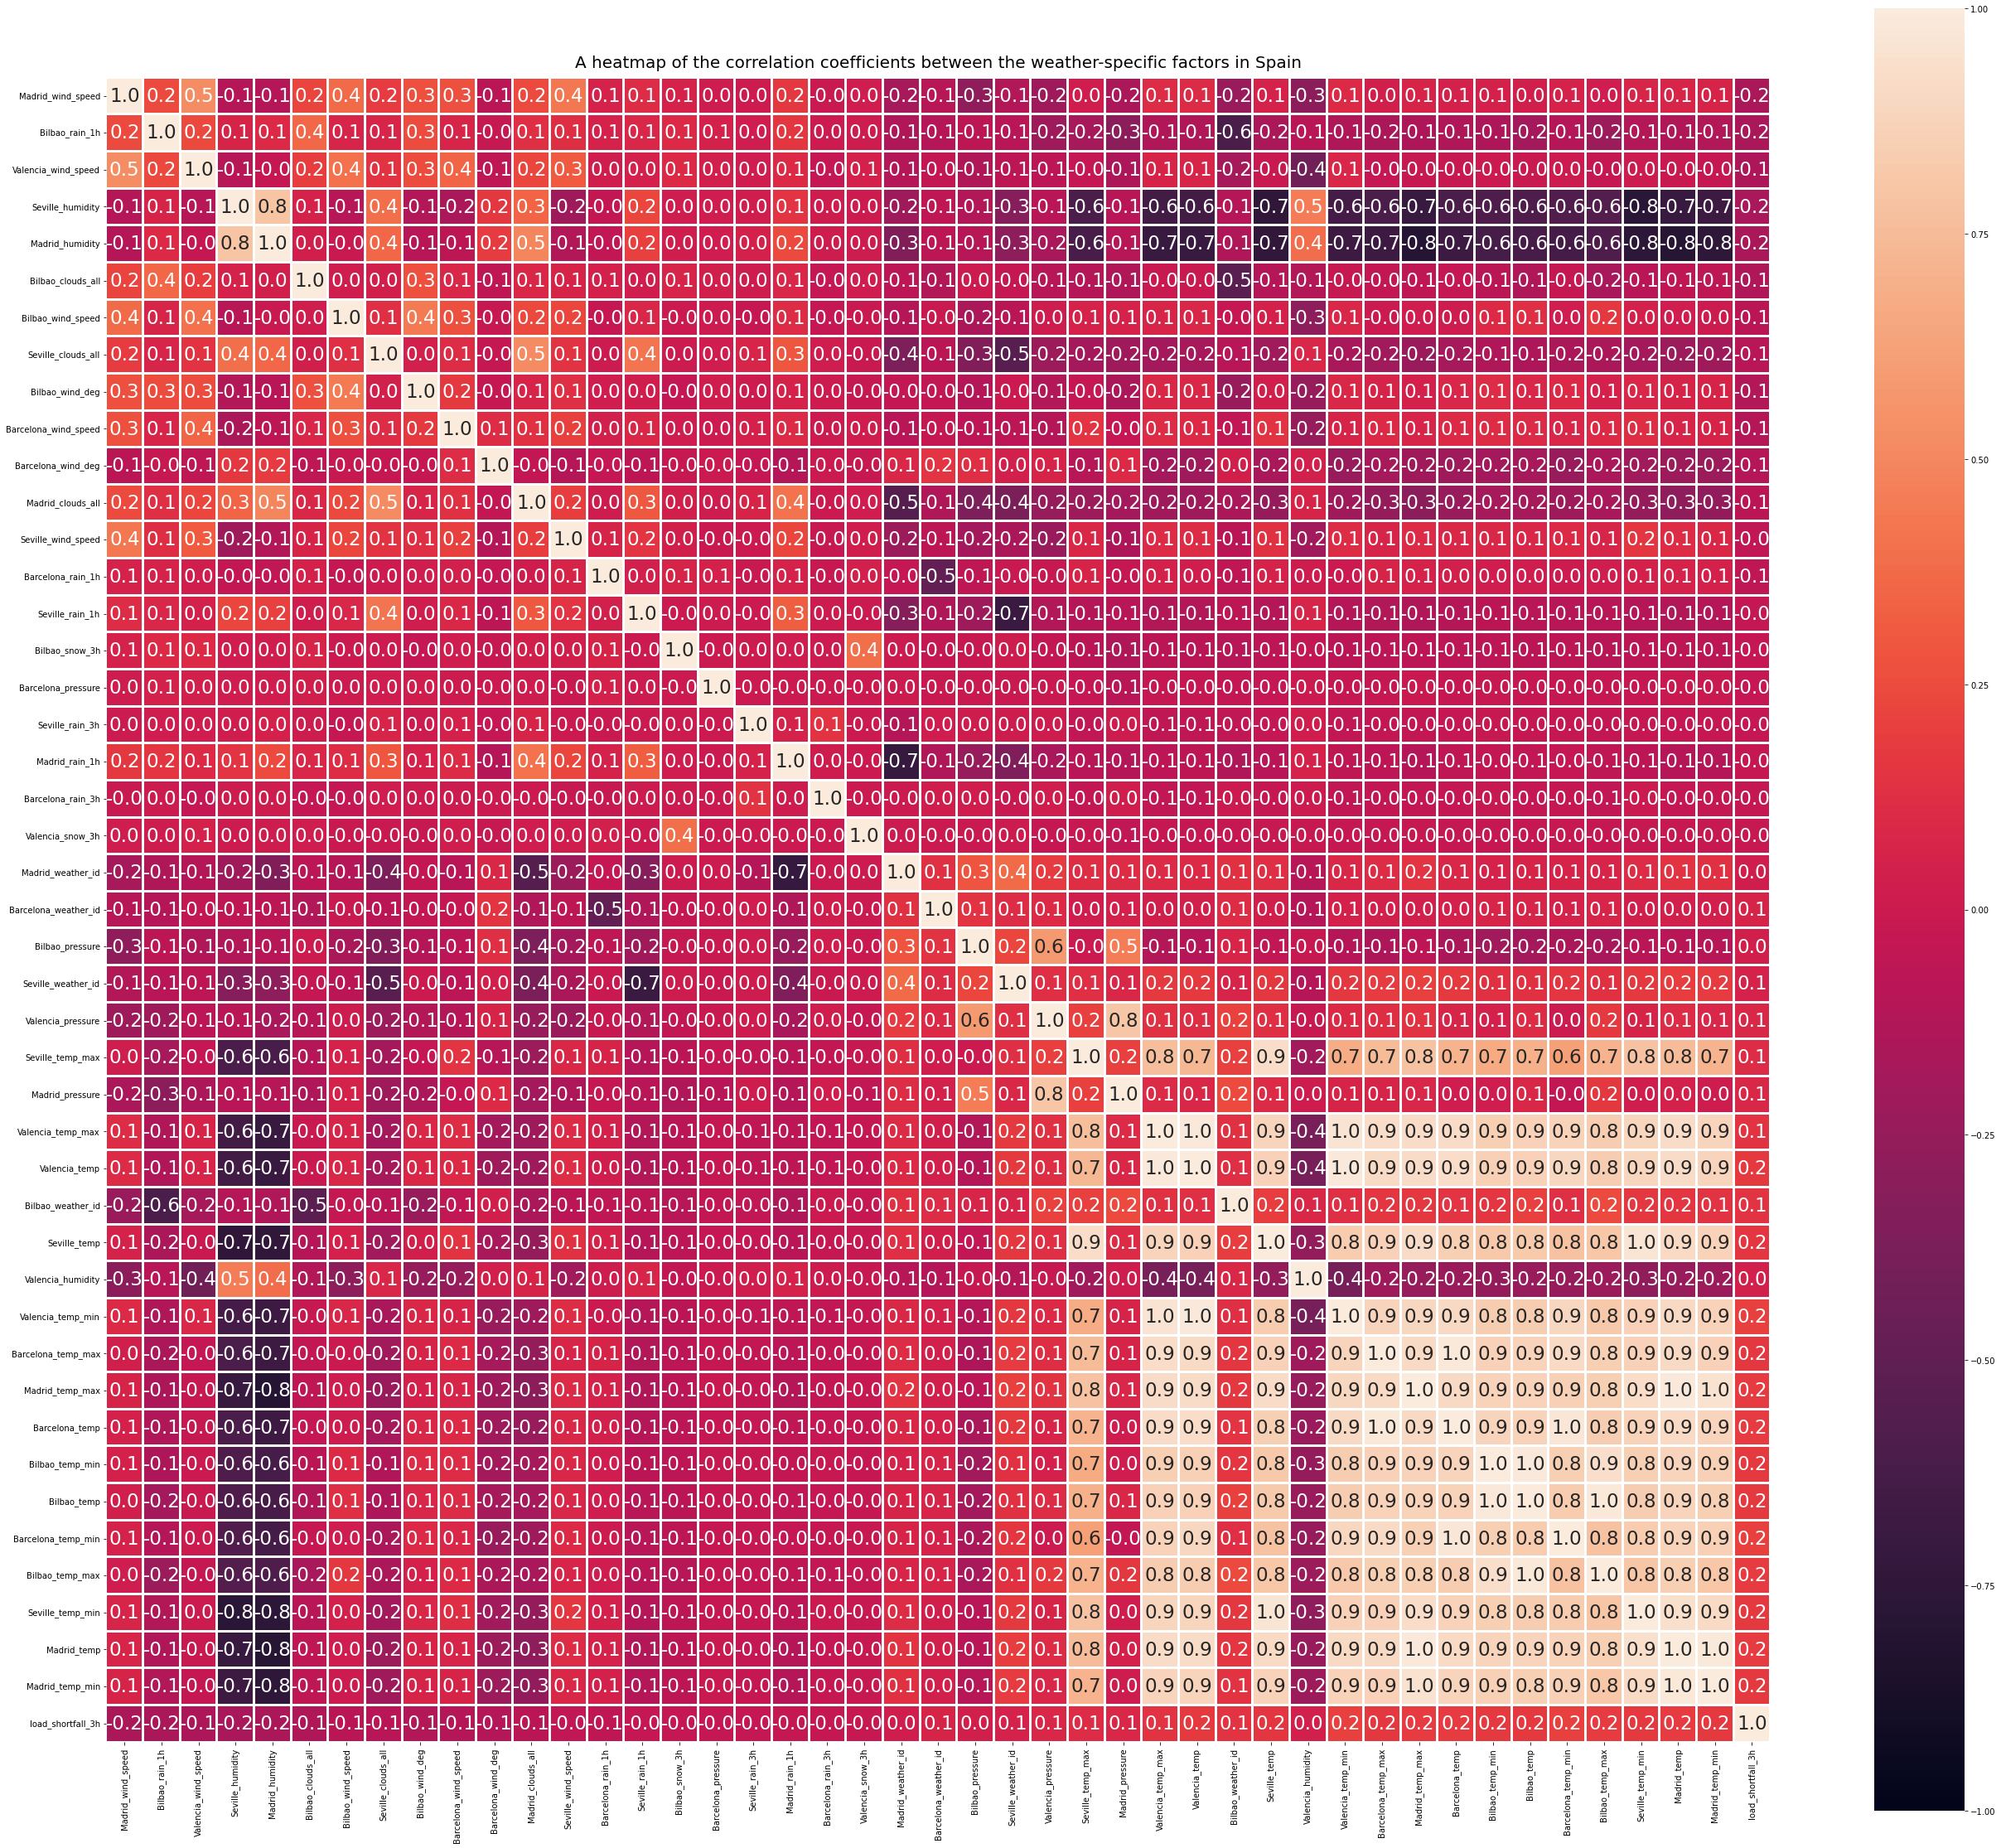

In [49]:
# evaluate correlation 

#Plot a heatmap with a display of the correlation coefficients

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

plt.subplots(figsize=(45,40))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, annot_kws={'size': 23}, fmt='.1f', square=True, linecolor="w", linewidths=2)
sns.set(font_scale=3.0)

heatmap.set_title('A heatmap of the correlation coefficients between the weather-specific factors in Spain', fontdict={'fontsize': 20}, pad=12);

**Insights of the data from the correlation analysis:**


The response variable has weak positive and negative relationships (correlations) with the predictor variables, since its correlation coefficients are between -0.5 < r < 0.5

However, there is a high collinearity between the predictor/ independent variables themselves. For example, there is high collinearity between Seville_humidity and Madrid_temperature, Seville_temp_min, Valencia_temp_max, Valencia_temp, etc as they have strong negative correlation coefficients which are as high as -0.7, -0.8

In [ ]:
#have a look at feature distributions
HISTOGRAM BETWEEN DIFFERENT CITIES
OR
BAR PLOTS/ GRAPHS





<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

**MISSING VALUES IN THE DATAFRAME**

In [50]:
#First, check for any null or missing values in the dataframe
df.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

From the results above, we can see that the 'Valencia_Pressure' column has 2,068 missing values, and load_shortfall column has 2920 missing values. However, it is acceptable for the load_shortfall_3h column to have these null values since the test dataset does not contain the predictor variables (y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


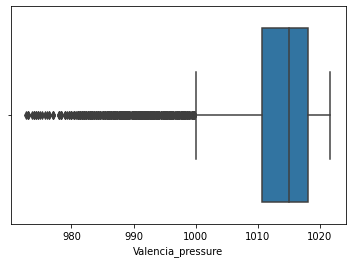

In [18]:
#Then, plot a boxplot of the Valencia_Pressure column to view the distribution of the data points
sns.boxplot(df['Valencia_pressure'])

In [59]:
#Then, print out the mean, median, and mode values of the valencia_pressure column to see how they vary from each other
print('Mean: ', df['Valencia_pressure'].mean())
print('Median: ', df['Valencia_pressure'].median())
print('Mode: ', df['Valencia_pressure'].mode()[0])


Mean:  1013.5670632543047
Median:  1016.6666666667
Mode:  1018.0


As we can see, the three summary statistics do not vary so much from each other, so we could use either value to impute the missing values in the valencia_pressure column

For this predict, we shall use the mode value for imputation purposes, 
because it is the most occurrying value in the column and also pressure tends to repeat itself more often than not

In [63]:
#Now, impute the missing values using the mode
df1 = df
df1['Valencia_pressure'] = df1['Valencia_pressure'].fillna(df1['Valencia_pressure'].mode()[0])
df1['Valencia_pressure']

0        1002.666667
1        1004.333333
2        1005.333333
3        1009.000000
4        1018.000000
            ...     
11678    1018.000000
11679    1018.000000
11680    1018.000000
11681    1018.000000
11682    1018.000000
Name: Valencia_pressure, Length: 11683, dtype: float64

In [64]:
#Check and confirm if the missing values from the valencia_pressure column have truly been removed
df1.isnull().sum()


time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure          0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

From the results above, we can confirm that there are no missing values in the valencia_pressure column, any more

In [ ]:
#create new features




In [71]:
# ENGINEER EXISTING FEATURES

#From the previous section, we saw that the dataframe has three columns that have the object datatype,
# i.e. they are not numerical hence cannot be processed with the linear regression model
#These three columns are the time, Valencia_wind_deg, and Seville_pressure
#Therefore, we have to transform the datatype of these three columns from object to float(64), i.e. numerical datatype

#Transform the time column 
df2 = df1
df2['time'] = pd.to_datetime(df2['time'])

#Transform the valencia_wind_deg column 
import string
df3 = df2
df3['Valencia_wind_deg'] = df3['Valencia_wind_deg'].str.extract('(\d+)') #extract the numbers from the string
df3['Valencia_wind_deg'] = pd.to_numeric(df3['Valencia_wind_deg']) #next, transform from object datatype to numeric

#Transform the Seville_pressure column 
df4 = df3
df4['Seville_pressure'] = df3['Seville_pressure'].str.extract('(\d+)') #extract the numbers from the string
df3['Seville_pressure'] = pd.to_numeric(df3['Seville_pressure']) #next, transform from object datatype to numeric

#Finally, check the datatypes of the dataframe to ensure the three columns are now numeric
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 11682
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  11683 non-null  datetime64[ns]
 1   Madrid_wind_speed     11683 non-null  float64       
 2   Valencia_wind_deg     11683 non-null  int64         
 3   Bilbao_rain_1h        11683 non-null  float64       
 4   Valencia_wind_speed   11683 non-null  float64       
 5   Seville_humidity      11683 non-null  float64       
 6   Madrid_humidity       11683 non-null  float64       
 7   Bilbao_clouds_all     11683 non-null  float64       
 8   Bilbao_wind_speed     11683 non-null  float64       
 9   Seville_clouds_all    11683 non-null  float64       
 10  Bilbao_wind_deg       11683 non-null  float64       
 11  Barcelona_wind_speed  11683 non-null  float64       
 12  Barcelona_wind_deg    11683 non-null  float64       
 13  Madrid_clouds_al

As can be seen, all the columns now are numeric and not objects

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic